# Regressie - intro

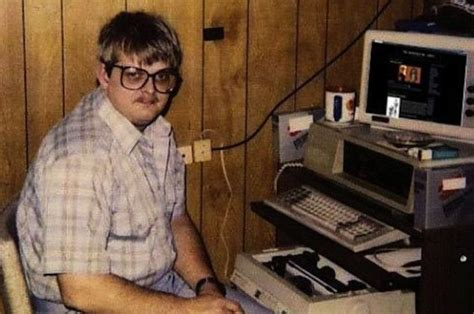

## Install

In [2]:
!pip3 install numpy
!pip3 install scipy

## Import

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as cp

## Predefine

In [4]:
def plot_init():
    
    fig, ax = plt.subplots()
    
    return ax


def plot_add(ax, x, y):
    
    ax.plot(x, y, linewidth=2.0)


def plot_show():
    
    plt.show()


def plot_graph(x, y):
    
    ax = plot_init()
    plot_add(ax, x, y)
    plot_show()

## Lineair verband
### Model
huizenprijs = vastgoed offset + prijs per oppervlak x oppervlak

p = 25.000 + 5.000 x oppervlak

### Stap 1: Maak huizenprijs model

In [6]:
def huizenprijs(b0, b1, opp):
    return b0 + b1 * opp

# def f(x, p, y):
#     return p + x * y


### Stap 2: Bekijk interval [50, 75] m2

In [7]:
p1 = huizenprijs(25000, 5000, 50)
p2 = huizenprijs(25000, 5000, 75)

print(p1, p2)

275000 400000


### Stap 3: Fit data

#### Use the curve fitting

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

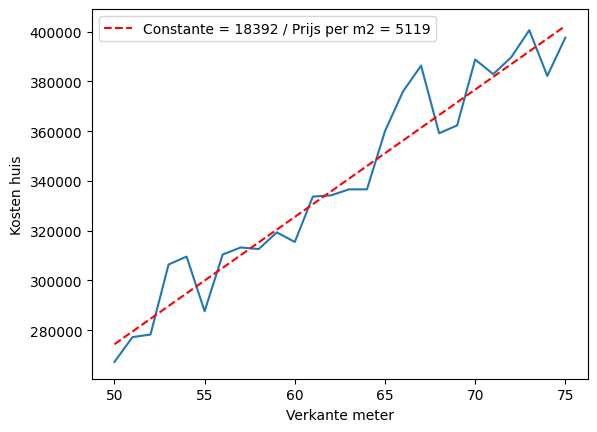

<Figure size 640x480 with 0 Axes>

In [152]:
# Define our model

def huizenprijs(opp, b0, b1):
    return b0 + b1 * opp

opp = np.linspace(50, 75, 26)
constant = 25000
coefficient = 5000

rng = np.random.default_rng()
ruis = 5000 * rng.normal(size=opp.size)

p_test = np.random.normal(huizenprijs(opp, constant, coefficient), 10000)
p = huizenprijs(opp, constant, coefficient) + ruis


# Use scipy optimize package
# Create fit

popt, pcov = cp.optimize.curve_fit(huizenprijs, opp, p)
popt_round = [round(cof) for cof in popt]

# Plot fit

plt.plot(opp, p_test)
plt.plot(opp, huizenprijs(opp, *popt), 'r--', label='Constante = %s / Prijs per m2 = %s' % tuple(popt_round))
plt.xlabel('Verkante meter')
plt.ylabel('Kosten huis')
plt.legend()
plt.show()
plt.clf()

### Stap 4: Extrapoleer

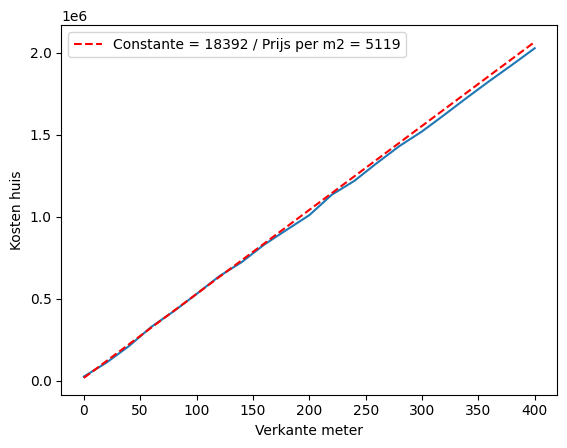

<Figure size 640x480 with 0 Axes>

In [157]:
# Create fit
# Zie vorige

# Plot prediction for whole range
opp = np.linspace(0, 400, 21)
p_test = np.random.normal(huizenprijs(opp, constant, coefficient), 10000)

plt.plot(opp, p_test)
plt.plot(opp, huizenprijs(opp, *popt), 'r--', label='Constante = %s / Prijs per m2 = %s' % tuple(popt_round))
plt.xlabel('Verkante meter')
plt.ylabel('Kosten huis')
plt.legend()
plt.show()
plt.clf()

## Polynomiale verbanden

### Model

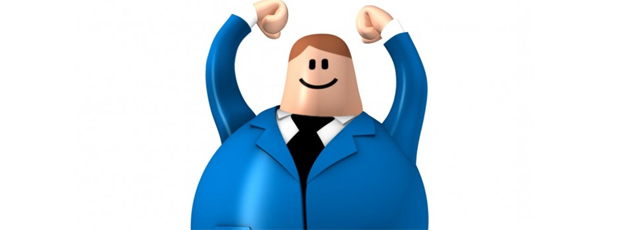

massa bolmannetje = dichtheid x bolvormigheid + benen + armen + hoofd

mass_bolman = 1.03 x radius^3 + 12.4 + 8.7 + 3.2

### Stap 1: Maak model bolmannetje

In [48]:
def model_bolmannetje(bolvormigheid, dichtheid, benen, armen, hoofd):
    return dichtheid * bolvormigheid**3 + benen + armen + hoofd


### Stap 2: Fit data

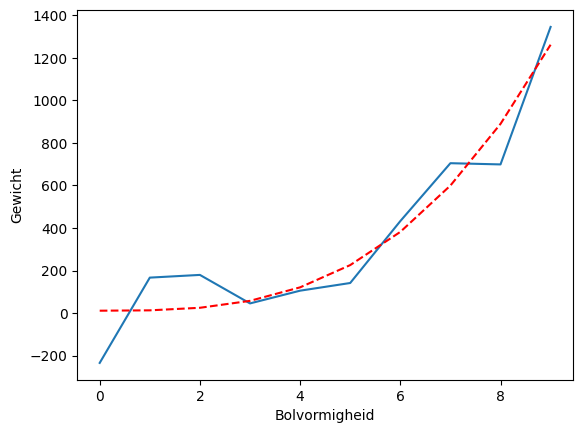

<Figure size 640x480 with 0 Axes>

In [144]:
# Define our model

dicht = 1.03
been = 12.4
arm = 8.7
hoofd = 3.2

# Bolvormigheid (voor n = 11)
xbol = np.arange(0, 10)

# Ruis voor constanten (+ 0-10%)
rng = np.random
ruis_const = rng.randint(0, 100, size=xbol.size) / 100

xdicht = xbol.size * [dicht] * (1 + ruis_const)
xbeen = xbol.size * [been] * (1 + ruis_const)
xarm = xbol.size * [arm] * (1 + ruis_const)
xhoofd = xbol.size * [hoofd] * (1 + ruis_const)

# print(xdicht)
# print(xbeen)
# print(xarm)
# print(xhoofd)

# Ruis voor gewicht
rng = np.random.default_rng()
# xbol = rng.normal(xbol, .5)

gewicht = model_bolmannetje(xbol, xdicht, xbeen, xarm, xhoofd)
gewicht = rng.normal(gewicht, 100)
# print(gewicht)

# Use scipy optimize package
# Create fit

popt, pcov = cp.optimize.curve_fit(model_bolmannetje, xbol, gewicht)
popt_round = [round(cof) for cof in popt]
# print(popt)

# Plot fit
plt.plot(xbol, gewicht)
plt.plot(xbol, model_bolmannetje(xbol, *popt), 'r--', label='Dichtheid, been, arm, hoofd = %s, %s, %s, %s' % tuple(popt))
plt.xlabel('Bolvormigheid')
plt.ylabel('Gewicht')
# plt.legend()
plt.show()
plt.clf()


## Combinatie periodiek en exponentieel verband

### Model

Finding Seasonal Trends in Time-Series Data

https://towardsdatascience.com/finding-seasonal-trends-in-time-series-data-with-python-ce10c37aa861